 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500 Index.

In [24]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp500_history.csv`: Contains historical closing prices of the S&P 500 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data

In [2]:
# Reading whale returns
df_whale_returns = pd.read_csv("Resources/whale_returns.csv", index_col ='Date', parse_dates=True, infer_datetime_format=True)

In [3]:
# Count nulls
count_nulls_whale = df_whale_returns.isnull().count()
print(count_nulls_whale)

SOROS FUND MANAGEMENT LLC      1060
PAULSON & CO.INC.              1060
TIGER GLOBAL MANAGEMENT LLC    1060
BERKSHIRE HATHAWAY INC         1060
dtype: int64


In [4]:
# Drop nulls
df_whale_returns = df_whale_returns.dropna().sort_index()
df_whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data

In [5]:
# Reading algorithmic returns
df_algo_returns = pd.read_csv("Resources/algo_returns.csv", index_col ='Date', parse_dates=True, infer_datetime_format=True)

In [6]:
# Count nulls
count_nulls_algo = df_algo_returns.isnull().count()
print(count_nulls_algo)

Algo 1    1241
Algo 2    1241
dtype: int64


In [7]:
# Drop nulls
df_aglo_reuturns = df_algo_returns.dropna().sort_index()
df_aglo_reuturns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P 500 Returns

Read the S&P 500 historic closing prices and create a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
df_sp500 = pd.read_csv("Resources/sp500_history.csv", index_col ='Date', parse_dates=True, infer_datetime_format=True)
df_sp500.head()

,Close
Date,
2019-04-23,$2933.68
2019-04-22,$2907.97
2019-04-18,$2905.03
2019-04-17,$2900.45
2019-04-16,$2907.06


In [9]:
# Check Data Types
df_sp500.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
df_sp500 = df_sp500["Close"].str.replace('$', '').copy()

In [11]:
# Calculate Daily Returns
daily_returns_sp500 = df_sp500.astype(float).pct_change()
daily_returns_sp500

Date
2019-04-23         NaN
2019-04-22   -0.008764
2019-04-18   -0.001011
2019-04-17   -0.001577
2019-04-16    0.002279
                ...   
2012-10-05    0.003469
2012-10-04    0.000322
2012-10-03   -0.007123
2012-10-02   -0.003611
2012-10-01   -0.000872
Name: Close, Length: 1649, dtype: float64

In [12]:
# Drop nulls
daily_returns_sp500 = daily_returns_sp500.dropna().sort_index()
daily_returns_sp500

Date
2012-10-01   -0.000872
2012-10-02   -0.003611
2012-10-03   -0.007123
2012-10-04    0.000322
2012-10-05    0.003469
                ...   
2019-04-15   -0.000509
2019-04-16    0.002279
2019-04-17   -0.001577
2019-04-18   -0.001011
2019-04-22   -0.008764
Name: Close, Length: 1648, dtype: float64

In [13]:
# Rename `Close` Column to be specific to this portfolio.
columns = ["daily_returns_sp500"]
daily_returns_sp500 = daily_returns_sp500.rename(index = "daily_returns_sp500")
daily_returns_sp500.head()

Date
2012-10-01   -0.000872
2012-10-02   -0.003611
2012-10-03   -0.007123
2012-10-04    0.000322
2012-10-05    0.003469
Name: daily_returns_sp500, dtype: float64

## Combine Whale, Algorithmic, and S&P 500 Returns

In [14]:
# Join Whale Returns, Algorithmic Returns, and the S&P 500 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([df_whale_returns,df_aglo_reuturns, daily_returns_sp500], axis= 'columns', join = 'inner')
combined_returns.columns = ['SOROS FUND MANAGEMENT LLC','PAULSON & CO INC', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'daily_returns_sp500']
combined_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO INC,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,daily_returns_sp500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,0.004408
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.001195
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.014378
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.003929
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.017254
...,...,...,...,...,...,...,...
2019-04-15,-0.001422,-0.001156,0.000398,-0.010492,-0.004331,-0.004572,-0.000509
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.002279
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.001577


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:xlabel='Date'>

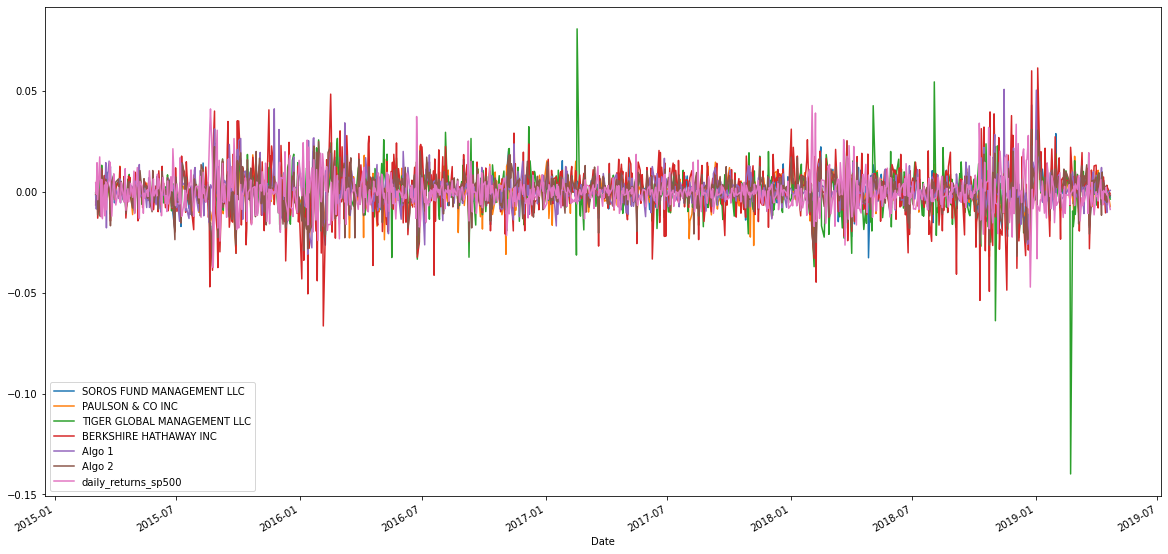

In [15]:
# Plot daily returns of all portfolios
#columns = ['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC.']

#Whale Funds
combined_returns['SOROS FUND MANAGEMENT LLC'].plot(figsize=(20,10),legend=True)
combined_returns['PAULSON & CO INC'].plot(figsize=(20,10),legend=True)
combined_returns['TIGER GLOBAL MANAGEMENT LLC'].plot(figsize=(20,10),legend=True)
combined_returns['BERKSHIRE HATHAWAY INC'].plot(figsize=(20,10),legend=True)

#Algorithmic Funds
combined_returns['Algo 1'].plot(figsize=(20,10),legend=True)
combined_returns['Algo 2'].plot(figsize=(20,10),legend=True)

#S&P 500
combined_returns['daily_returns_sp500'].plot(figsize=(20,10),legend=True)

#### Calculate and Plot cumulative returns.

<AxesSubplot:xlabel='Date'>

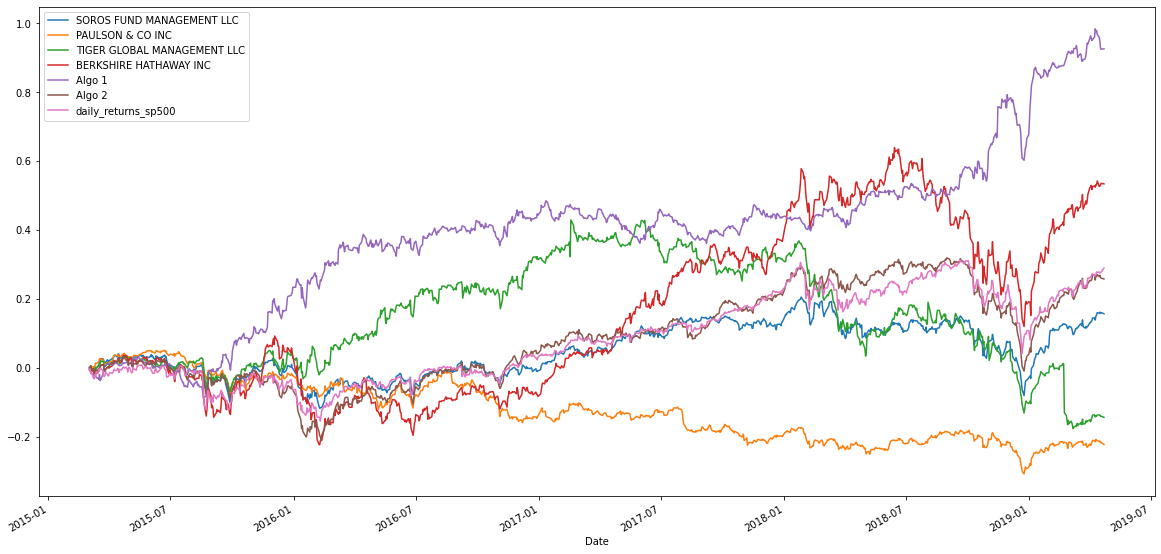

In [16]:
# Calculate cumulative returns of all portfolios
#Whales
soros_fund_management_llc_cum = (1+combined_returns['SOROS FUND MANAGEMENT LLC']).cumprod() - 1
paulson_and_co_cum = (1+combined_returns['PAULSON & CO INC']).cumprod() - 1
tiger_global_management_llc_cum = (1+combined_returns['TIGER GLOBAL MANAGEMENT LLC']).cumprod() - 1
berkshire_hathaway_inc_cum = (1+combined_returns['BERKSHIRE HATHAWAY INC']).cumprod() - 1

#Algorithm
algo1_cum = (1+combined_returns['Algo 1']).cumprod() - 1
algo2_cum = (1+combined_returns['Algo 2']).cumprod() - 1

#S&P500
sp500_cum = (1-combined_returns['daily_returns_sp500']).cumprod() - 1 ##Ask in office hours why this is different??? or if i did it wrong

# Plot cumulative returns
#Whales
soros_fund_management_llc_cum.plot(figsize=(20,10),legend=True)
paulson_and_co_cum.plot(figsize=(20,10),legend=True)
tiger_global_management_llc_cum.plot(figsize=(20,10),legend=True)
berkshire_hathaway_inc_cum.plot(figsize=(20,10),legend=True)

#Algorithm
algo1_cum.plot(figsize=(20,10),legend=True)
algo2_cum.plot(figsize=(20,10),legend=True)

#S&P 500
sp500_cum.plot(figsize=(20,10),legend=True)

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios
4. Determine which portfolios are riskier than the S&P 500
5. Calculate the Annualized Standard Deviation

### Create a box plot for each portfolio


AttributeError: 'dict' object has no attribute 'axis'

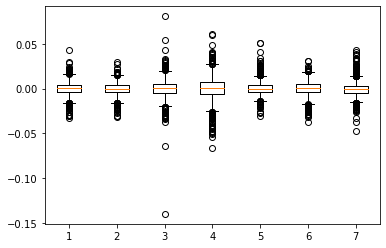

In [54]:
# Box plot to visually show risk
#ax = plt.boxplot([combined_returns['SOROS FUND MANAGEMENT LLC'],combined_returns['PAULSON & CO INC'],combined_returns['TIGER GLOBAL MANAGEMENT LLC'],combined_returns['BERKSHIRE HATHAWAY INC'],combined_returns['Algo 1'],combined_returns['Algo 2'],combined_returns['daily_returns_sp500']])
#ax.axis(['SOROS FUND MANAGEMENT LLC','PAULSON & CO INC', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'daily_returns_sp500'])
#ax.legend(['SOROS FUND MANAGEMENT LLC','PAULSON & CO INC', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'daily_returns_sp500'])



### Calculate Standard Deviations

In [55]:
# Calculate the daily standard deviations of all portfolios
daily_std = combined_returns.std()
daily_std

SOROS FUND MANAGEMENT LLC      0.007896
PAULSON & CO INC               0.007026
TIGER GLOBAL MANAGEMENT LLC    0.010897
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007623
Algo 2                         0.008341
daily_returns_sp500            0.008587
dtype: float64

### Determine which portfolios are riskier than the S&P 500

In [59]:
# Calculate  the daily standard deviation of S&P 500
daily_std['daily_returns_sp500']

# Determine which portfolios are riskier than the S&P 500


0.00858688974707399

### Calculate the Annualized Standard Deviation

<AxesSubplot:>

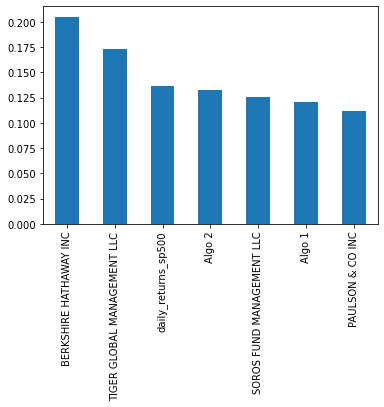

In [68]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std = daily_std*np.sqrt(252)

# Determine which portfolios are riskier than the S&P 500
annualized_std.sort_values(ascending=False, inplace = True)
annualized_std

annualized_std.plot(kind='bar')
#We see Berkshire Hathaway Inc. and Tiger Global MAnagement LLC are riskier than the S&P 500.

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for the S&P 500 using a 21-day window
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P 500
3. Choose one portfolio, then calculate and plot the 60-day rolling beta between it and the S&P 500

### Calculate and plot rolling `std` for all portfolios with 21-day window

<AxesSubplot:xlabel='Date'>

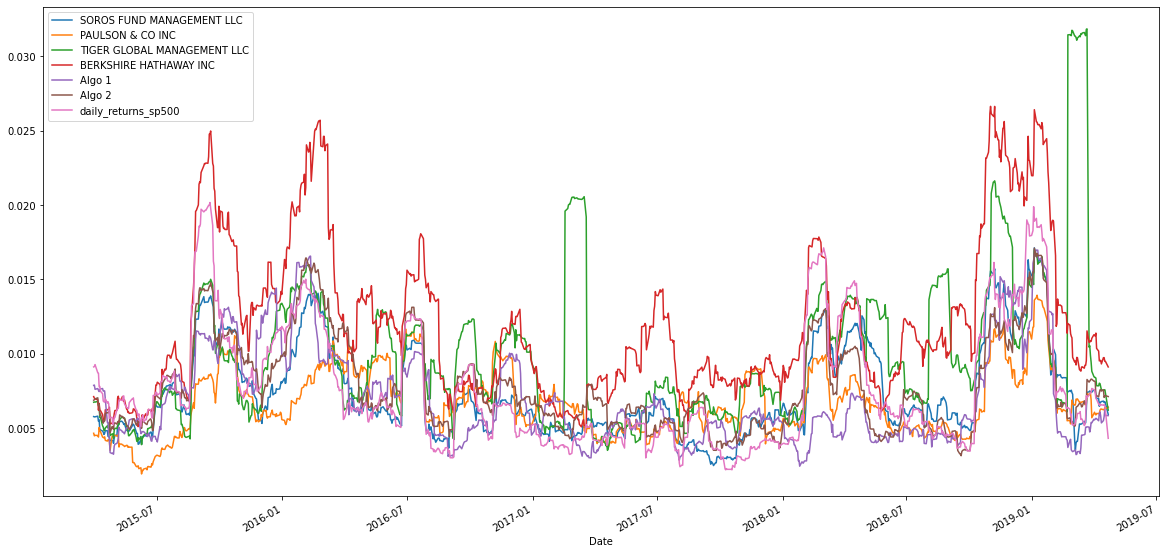

In [22]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
soros_fund_management_llc_std = combined_returns['SOROS FUND MANAGEMENT LLC'].rolling(window=21).std()
paulson_and_co_std = combined_returns['PAULSON & CO INC'].rolling(window=21).std()
tiger_global_management_llc_std = combined_returns['TIGER GLOBAL MANAGEMENT LLC'].rolling(window=21).std()
berkshire_hathaway_inc_std = combined_returns['BERKSHIRE HATHAWAY INC'].rolling(window=21).std()

#Algorithmic Funds
algo1_std = combined_returns['Algo 1'].rolling(window=21).std()
algo2_std = combined_returns['Algo 2'].rolling(window=21).std()

#S&P 500
sp500_std = combined_returns['daily_returns_sp500'].rolling(window=21).std()


# Plot the rolling standard deviation
#Whale
soros_fund_management_llc_std.plot(figsize=(20,10),legend=True)
paulson_and_co_std.plot(figsize=(20,10),legend=True)
tiger_global_management_llc_std.plot(figsize=(20,10),legend=True)
berkshire_hathaway_inc_std.plot(figsize=(20,10),legend=True)

#Algorithm
algo1_std.plot(figsize=(20,10),legend=True)
algo2_std.plot(figsize=(20,10),legend=True)

#S&P 500
sp500_std.plot(figsize=(20,10),legend=True)

### Calculate and plot the correlation

<AxesSubplot:>

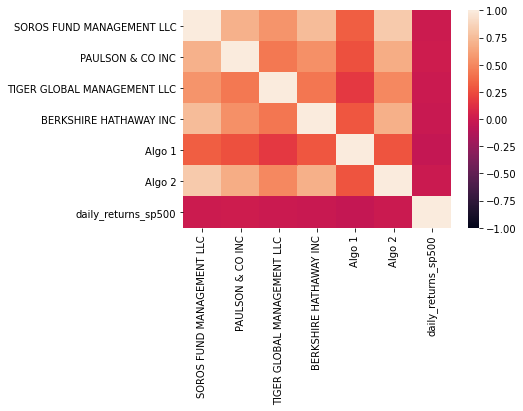

In [116]:
# Calculate the correlation
correlation = combined_returns.corr()
# Display de correlation matrix
correlation
sns.heatmap(correlation,vmin=-1,vmax=1)

### Calculate and Plot Beta for a chosen portfolio and the S&P 500

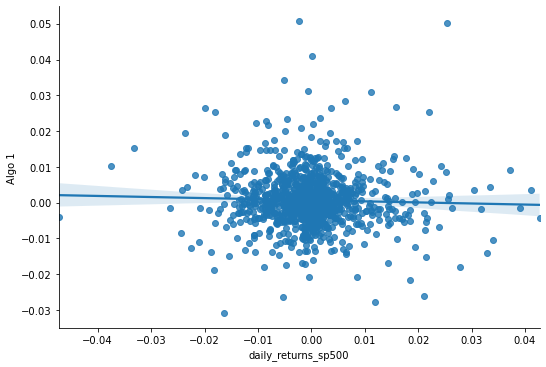

In [28]:
# Calculate covariance of a single portfolio
algo1_cov = combined_returns['Algo 1'].cov(combined_returns['daily_returns_sp500'])

# Calculate variance of S&P 500
sp500_var = combined_returns['daily_returns_sp500'].var()

# Computing beta
beta = algo1_cov/sp500_var

# Plot beta trend
sns.lmplot(x='daily_returns_sp500', y='Algo 1', data=combined_returns, aspect=1.5, fit_reg=True) 

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half-life.

<AxesSubplot:xlabel='Date'>

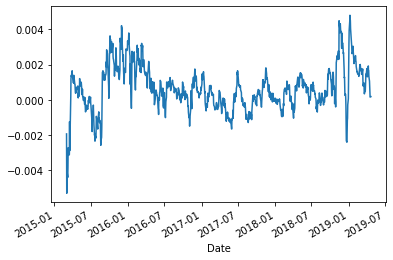

In [38]:
# Use `ewm` to calculate the rolling window
combined_returns['Algo 1'].ewm(halflife='21 days', times=combined_returns.index).mean().plot()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [40]:
# Annualized Sharpe Ratios
sharpe_ratios = ((combined_returns.mean()-combined_returns['daily_returns_sp500'].mean())*252)/(combined_returns.std()*np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.906838
PAULSON & CO INC               0.142411
TIGER GLOBAL MANAGEMENT LLC    0.278448
BERKSHIRE HATHAWAY INC         0.951436
Algo 1                         1.953767
Algo 2                         1.018189
daily_returns_sp500            0.000000
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

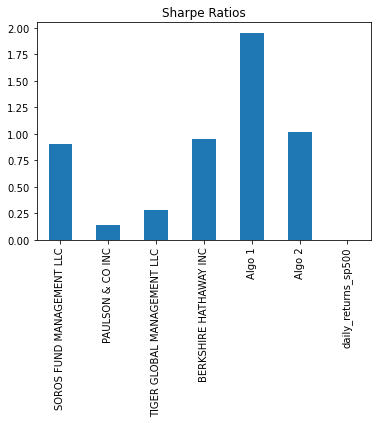

In [41]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

### Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

Write your answer here!

Generally, the algorithmc strategies have outperformed the market and the Whale portfolios. We can see there was a rapid increase in how well Algo 1 did in particular after and during the dip in the overall market at the end of 2018.

The Sharpe Ratio of Algo 1 is significantly higher than the rest of the investments as seen in the above bar graph.

Overall, it would be prudent for Harold to shut his mouth and let the algorithms do their job.

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P 500. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others
5. Include correlation analysis to determine which stocks (if any) are correlated

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

For this demo solution, we fetch data from three companies listes in the S&P 500 index.

* `GOOG` - [Google, LLC](https://en.wikipedia.org/wiki/Google)

* `AAPL` - [Apple Inc.](https://en.wikipedia.org/wiki/Apple_Inc.)

* `COST` - [Costco Wholesale Corporation](https://en.wikipedia.org/wiki/Costco)

In [81]:
# Reading data from 1st stock
goog_df = pd.read_csv('Resources/goog_historical.csv', index_col = 'Trade DATE', parse_dates = True, infer_datetime_format = True)
goog_df

,Symbol,NOCP
Trade DATE,,
2019-05-09,GOOG,1162.38
2019-05-08,GOOG,1166.27
2019-05-07,GOOG,1174.10
2019-05-06,GOOG,1189.39
2019-05-03,GOOG,1185.40
...,...,...
2018-05-17,GOOG,1078.59
2018-05-16,GOOG,1081.77
2018-05-15,GOOG,1079.23


In [82]:
# Reading data from 2nd stock
aapl_df = pd.read_csv('Resources/aapl_historical.csv', index_col = "Trade DATE", parse_dates=True, infer_datetime_format=True)
aapl_df

,Symbol,NOCP
Trade DATE,,
2019-05-09,AAPL,200.72
2019-05-08,AAPL,202.90
2019-05-07,AAPL,202.86
2019-05-06,AAPL,208.48
2019-05-03,AAPL,211.75
...,...,...
2018-05-17,AAPL,186.99
2018-05-16,AAPL,188.18
2018-05-15,AAPL,186.44


In [83]:
# Reading data from 3rd stock
cost_df = pd.read_csv('Resources/cost_historical.csv', index_col='Trade DATE', parse_dates=True, infer_datetime_format=True)
cost_df

,Symbol,NOCP
Trade DATE,,
2019-05-09,COST,243.47
2019-05-08,COST,241.34
2019-05-07,COST,240.18
2019-05-06,COST,244.23
2019-05-03,COST,244.62
...,...,...
2018-05-17,COST,199.60
2018-05-16,COST,198.71
2018-05-15,COST,195.48


In [97]:
# Combine all stocks in a single DataFrame
combined_personal_portfolio = pd.concat([aapl_df, cost_df, goog_df], axis='rows', join = 'inner')


In [98]:
# Reset Date index


In [99]:
# Reorganize portfolio data by having a column per symbol
combined_personal_portfolio = combined_personal_portfolio.pivot_table(values="NOCP", index="Trade DATE", columns = "Symbol")
combined_personal_portfolio.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [100]:
# Calculate daily returns
daily_returns = combined_personal_portfolio.pct_change()

# Drop NAs
daily_returns.dropna(inplace=True)

# Display sample data
daily_returns

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339
...,...,...,...
2019-05-03,0.012431,0.007953,0.019602
2019-05-06,-0.015443,-0.001594,0.003366
2019-05-07,-0.026957,-0.016583,-0.012855


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [101]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_returns = daily_returns.dot(weights)

# Display sample data
portfolio_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [104]:
# Join your returns DataFrame to the original returns DataFrame
daily_returns = pd.concat([daily_returns, portfolio_returns], axis = 'columns', join = 'inner')
daily_returns.columns = ['AAPL', 'COST', 'GOOG','All Returns']
daily_returns

,AAPL,COST,GOOG,All Returns
Trade DATE,,,,
2018-05-14,-0.002333,0.000613,0.001766,0.000015
2018-05-15,-0.009088,-0.002042,-0.019060,-0.010064
2018-05-16,0.009333,0.016523,0.002354,0.009403
2018-05-17,-0.006324,0.004479,-0.002940,-0.001595
2018-05-18,-0.003637,-0.003206,-0.011339,-0.006061
...,...,...,...,...
2019-05-03,0.012431,0.007953,0.019602,0.013329
2019-05-06,-0.015443,-0.001594,0.003366,-0.004557
2019-05-07,-0.026957,-0.016583,-0.012855,-0.018798


In [105]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
daily_returns.dropna(inplace=True)

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [107]:
# Calculate the annualized `std`
annualized_std = daily_returns.std()*np.sqrt(252)
annualized_std

AAPL           0.296955
COST           0.209320
GOOG           0.263554
All Returns    0.210262
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Trade DATE'>

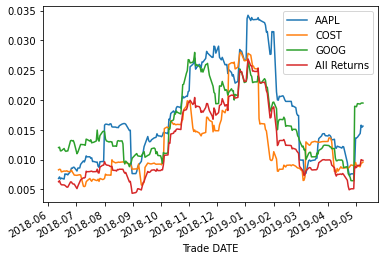

In [115]:
# Calculate rolling standard deviation
# Plot rolling standard deviation

daily_returns.rolling(window=21).std().plot()



### Calculate and plot the correlation

<AxesSubplot:>

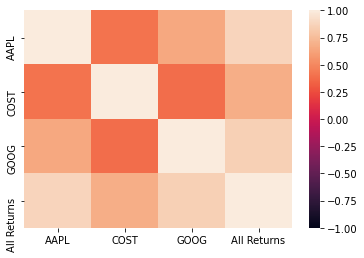

In [109]:
# Calculate and plot the correlation
correlation = daily_returns.corr()
sns.heatmap(correlation,vmin=-1,vmax=1)

### Calculate and Plot Rolling 60-day Beta for Your Portfolio compared to the S&P 500

<AxesSubplot:>

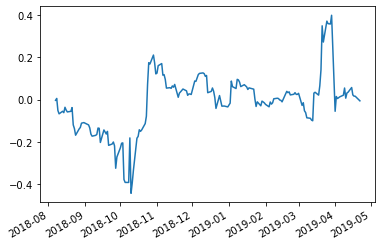

In [111]:
# Calculate and plot Beta
#Calculate Covariance of portfolio against sp500
covariance = daily_returns['All Returns'].rolling(window=60).cov(combined_returns['daily_returns_sp500'])

#Calcualte Variance of sp500
variance = combined_returns['daily_returns_sp500'].rolling(window=60).var()

#Calcualte the rolling 60 day Beta
beta = covariance/variance
beta.plot()

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [112]:
# Calculate Annualzied Sharpe Ratios
my_sharpe_ratio =(daily_returns.mean()-combined_returns['daily_returns_sp500'].mean()*252)/(combined_returns['daily_returns_sp500'].std()*np.sqrt(252))
my_sharpe_ratio

AAPL           0.521706
COST           0.525654
GOOG           0.521265
All Returns    0.522875
dtype: float64

<AxesSubplot:title={'center':'My Sharpe Ratio'}>

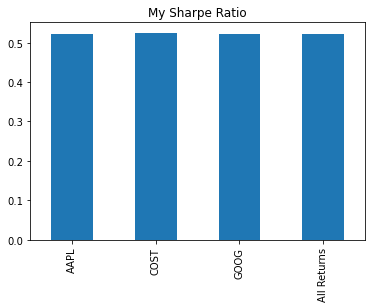

In [113]:
# Visualize the sharpe ratios as a bar plot
my_sharpe_ratio.plot(kind='bar', title = 'My Sharpe Ratio')

### How does your portfolio do?

Write your answer here!